# Rename cells and remove bad slide

## Rename B cells

In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import squidpy as sq
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
import seaborn as sns
import time
import gc
import warnings
warnings.filterwarnings("ignore")

In [2]:
adata = sc.read('../data/non_denoised/spe_minor_celltypes_cropped.h5ad')
adata.obs['minor_cell_type']=adata.obs['minor_cell_type'].astype('str')
adata.obs['major_cell_type']=adata.obs['major_cell_type'].astype('str')
adata

AnnData object with n_obs × n_vars = 524521 × 36
    obs: 'area', 'centroid-0', 'centroid-1', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'Cell_ID', 'library_id', 'sample_id', 'ObjectNumber', 'patient_n', 'timepoint', 'tissue_id', 'slide_id', 'ROI', 'width_px', 'height_px', 'major_celltype', 'major_cell_type', 'minor_cell_type', 'DFCI_id', 'MRN'
    uns: 'spatial'
    obsm: 'PCA', 'UMAP_mnnCorrected', 'fastMNN', 'spatial'
    layers: 'exprs', 'logcounts'

In [3]:
adata.obs[adata.obs['library_id'] == 'ROI001_45629_ROI_1']

,area,centroid-0,centroid-1,axis_major_length,axis_minor_length,eccentricity,Cell_ID,library_id,sample_id,ObjectNumber,...,tissue_id,slide_id,ROI,width_px,height_px,major_celltype,major_cell_type,minor_cell_type,DFCI_id,MRN
s45629_1,146,26.143836,680.623288,16.030112,12.187841,0.649561,1,ROI001_45629_ROI_1,ROI001_45629_ROI_1,1,...,BS-21-J45629,12,ROI001,1642,2244,CD4 Tunspecified,T,CD4 Tunspecified,14,568462
s45629_2,223,34.098655,753.829596,22.191129,13.214710,0.803359,2,ROI001_45629_ROI_1,ROI001_45629_ROI_1,2,...,BS-21-J45629,12,ROI001,1642,2244,CD4 Tunspecified,T,CD4 Tunspecified,14,568462
s45629_3,97,32.144330,743.432990,12.857236,9.794683,0.647809,3,ROI001_45629_ROI_1,ROI001_45629_ROI_1,3,...,BS-21-J45629,12,ROI001,1642,2244,CD4 Tnaive,T,CD4 Tnaive,14,568462
s45629_4,96,30.500000,881.500000,11.135529,11.135529,0.000000,4,ROI001_45629_ROI_1,ROI001_45629_ROI_1,4,...,BS-21-J45629,12,ROI001,1642,2244,CD4 Tunspecified,T,CD4 Tunspecified,14,568462
s45629_5,135,34.570370,700.585185,18.682048,9.583967,0.858386,5,ROI001_45629_ROI_1,ROI001_45629_ROI_1,5,...,BS-21-J45629,12,ROI001,1642,2244,CD4 Tunspecified,T,CD4 Tunspecified,14,568462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
s45629_10177,67,2216.149254,1193.865672,11.138862,7.799542,0.713937,10177,ROI001_45629_ROI_1,ROI001_45629_ROI_1,10177,...,BS-21-J45629,12,ROI001,1642,2244,CD4 Tunspecified,T,CD4 Tunspecified,17,885194
s45629_10178,121,2215.380165,1204.000000,14.020918,11.171568,0.604271,10178,ROI001_45629_ROI_1,ROI001_45629_ROI_1,10178,...,BS-21-J45629,12,ROI001,1642,2244,CD4 Tunspecified,T,CD4 Tunspecified,17,885194
s45629_10179,78,2218.807692,1140.551282,12.505907,8.038005,0.766087,10179,ROI001_45629_ROI_1,ROI001_45629_ROI_1,10179,...,BS-21-J45629,12,ROI001,1642,2244,Unclassified,Unclassified,Unclassified,17,885194
s45629_10180,50,2220.640000,1186.800000,10.787736,6.035822,0.828825,10180,ROI001_45629_ROI_1,ROI001_45629_ROI_1,10180,...,BS-21-J45629,12,ROI001,1642,2244,CD4 Tunspecified,T,CD4 Tunspecified,17,885194


In [3]:
slides_oi=['ROI002_34234_ROI_2', 'ROI001_55153_ROI_1', 'ROI001_62626_ROI_1', 'ROI001_41659_ROI_1', 'ROI003_10658_ROI_001', 'ROI003_46009_ROI_1']

In [4]:
def subset_adata(adata,library_id):
    adata_tiny = adata[adata.obs['library_id']==library_id]
    adata_tiny.obs['major_cell_type']=adata_tiny.obs['major_cell_type'].astype('str')
    adata_tiny.obs['major_cell_type']=adata_tiny.obs['major_cell_type'].astype('str')
    return adata_tiny

def get_mean_values(adata):
    mean_values = (pd.DataFrame(adata.layers['exprs'], index=adata.obs_names,columns=adata.var_names)
                   [['aSMA', 'CD14', 'CD16', 'CD163', 'CD31', 'CD45',
                   'CD4', 'CD68', 'CD20', 'CD8', 'CD56', 'CD138',
                   'CD127','CD3', 'CD27', 'CD45RO']]
                  )
    mean_values = mean_values.groupby(adata.obs['minor_cell_type']).mean()
    return mean_values



def order_colors(adata, mean_values):
    unique_main_clusters = adata.obs['major_cell_type'].unique()
    main_palette = sns.color_palette('hsv', len(unique_main_clusters))
    
    # Create a dictionary mapping main_clusters to colors
    main_cluster_colors = {cluster: to_hex(color) for cluster, color in zip(unique_main_clusters, main_palette)}
    
    # Generate shades for sub_clusters within each main_cluster
    sub_cluster_colors = {}
    for main_cluster in unique_main_clusters:
        sub_clusters = adata.obs[adata.obs['major_cell_type'] == main_cluster]['minor_cell_type'].unique()
        sub_palette = sns.light_palette(main_cluster_colors[main_cluster], len(sub_clusters), reverse=True)
        for sub_cluster, color in zip(sub_clusters, sub_palette):
            sub_cluster_colors[sub_cluster] = to_hex(color)
    
    # Create column_colors DataFrame for the unique sub_clusters
    column_colors = pd.DataFrame({
        'main_clusters': mean_values.index.map(lambda x: adata.obs.loc[adata.obs['minor_cell_type'] == x, 'major_cell_type'].values[0]).map(main_cluster_colors),
        'sub_clusters': mean_values.index.map(sub_cluster_colors)
    }, index=mean_values.index)
    
    # Transpose the mean_values DataFrame
    transposed_mean_values = mean_values.T
    
    # Order the columns by main clusters
    ordered_columns = transposed_mean_values.columns[np.argsort([adata.obs.loc[adata.obs['minor_cell_type'] == col, 'major_cell_type'].values[0] for col in transposed_mean_values.columns])]
    
    # Reorder transposed_mean_values and column_colors
    transposed_mean_values = transposed_mean_values[ordered_columns]
    column_colors = column_colors.loc[ordered_columns]
    return transposed_mean_values, column_colors, main_cluster_colors, sub_cluster_colors,unique_main_clusters


def plot_heatmap(transposed_mean_values, column_colors, main_cluster_colors, sub_cluster_colors,unique_main_clusters):
    
    sns.set(font_scale=1.2)
    # Create the clustermap
    g = sns.clustermap(transposed_mean_values,
                       col_colors=column_colors[['main_clusters', 'sub_clusters']],
                       cmap='bwr',
                       figsize=(15, 10),
                       col_cluster=False,  # Disable column clustering since we are manually ordering columns
                       row_cluster=True)  # Enable row clustering if you want to cluster the rows
    
    # Adjust the legend for main and sub cluster colors
    for label in unique_main_clusters:
        g.ax_col_dendrogram.bar(0, 0, color=main_cluster_colors[label],
                                label=label, linewidth=0)
    g.ax_col_dendrogram.legend(title='Major cell type', loc='center', ncol=5)
    
    for label in sub_cluster_colors.keys():
        g.ax_col_dendrogram.bar(0, 0, color=sub_cluster_colors[label],
                                label=label, linewidth=0)
    
    plt.show()


def plot_spatial(adata,library_id):
    sq.pl.spatial_segment(
        adata,
        color="minor_cell_type",
        library_key="library_id",
        library_id=library_id,
        seg_cell_id="Cell_ID",
        title=library_id + ' ' + adata.obs['timepoint'].unique()[0],
        img=False,
        outline=False,
        figsize=(10,6)
    )


def plot_slide(adata,library_id):
    adata_tiny=subset_adata(adata,library_id)
    mean_values=get_mean_values(adata_tiny)
    transposed_mean_values, column_colors, main_cluster_colors, sub_cluster_colors,unique_main_clusters=order_colors(adata_tiny, mean_values)
    plot_spatial(adata_tiny,library_id)
    plot_heatmap(transposed_mean_values, column_colors, main_cluster_colors, sub_cluster_colors,unique_main_clusters)
    del adata_tiny
    gc.collect()


def update_labels(adata, map_dict, library_id,target='Myeloma'):
    sample_mask = adata.obs['library_id'] == library_id
    adata.obs.loc[sample_mask, 'minor_cell_type'] = adata.obs.loc[sample_mask, 'minor_cell_type'].replace(map_dict)
    myeloma_mask = adata.obs['minor_cell_type'] == target
    target_mask = sample_mask & myeloma_mask
    adata.obs.loc[target_mask, 'major_cell_type'] = target
    return adata

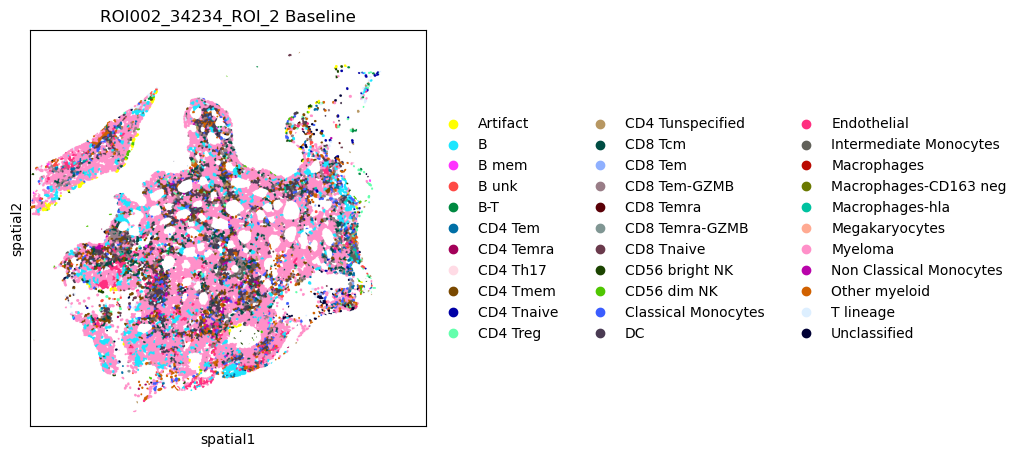

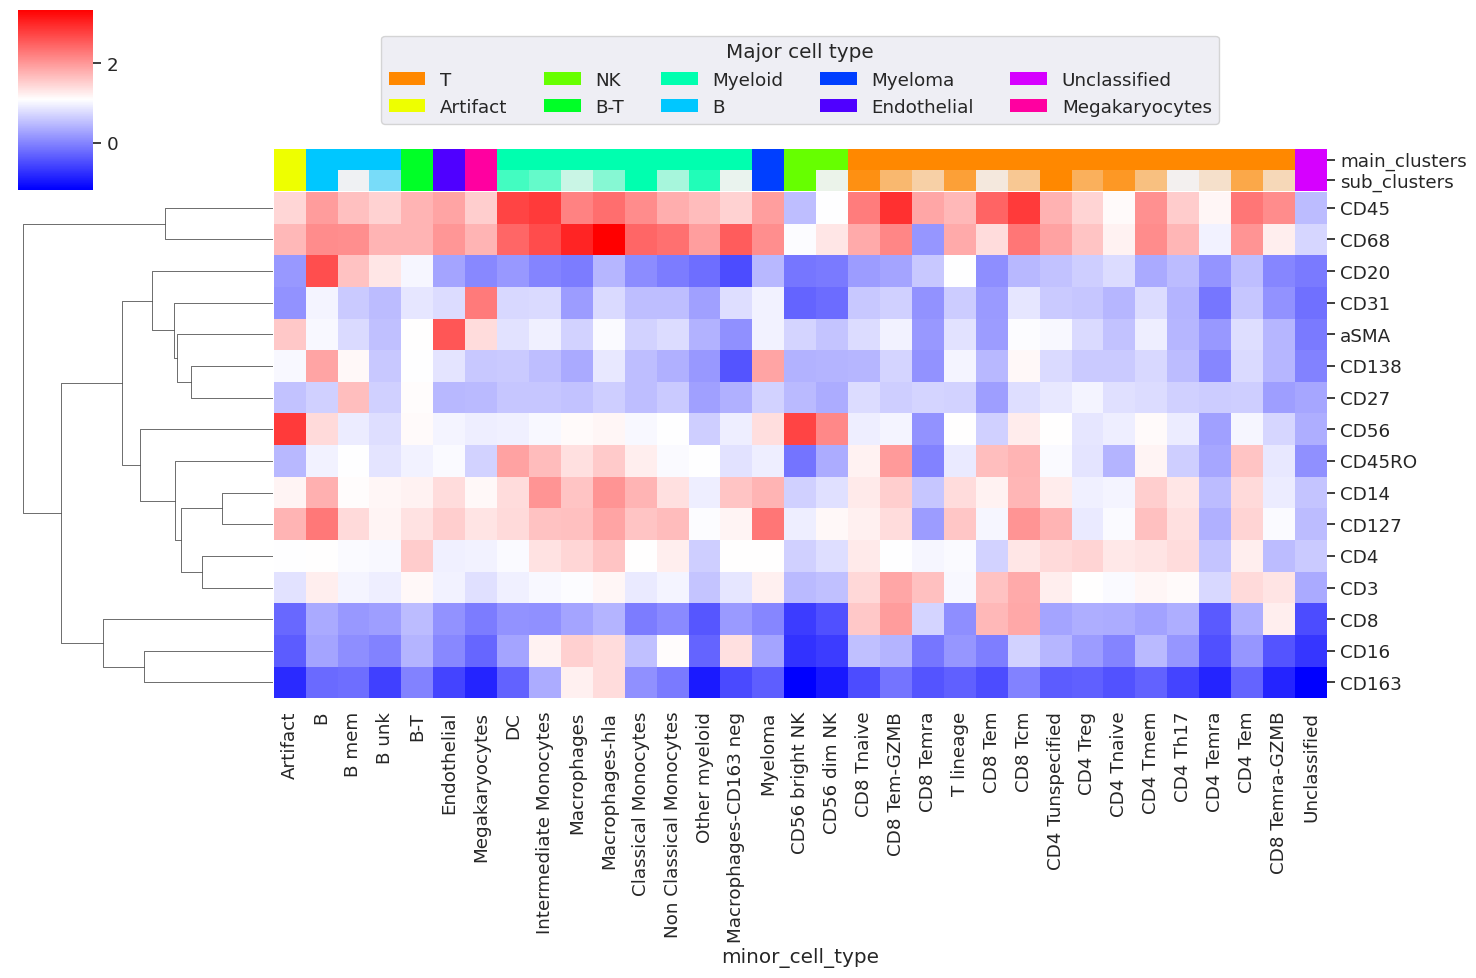

In [5]:
plot_slide(adata,slides_oi[0])

In [6]:
map_dict = {'B':'Myeloma','B mem':'Myeloma','B unk':'B'}
adata= update_labels(adata, map_dict,slides_oi[0])

B and B mem are positive to CD138: label them as myeloma

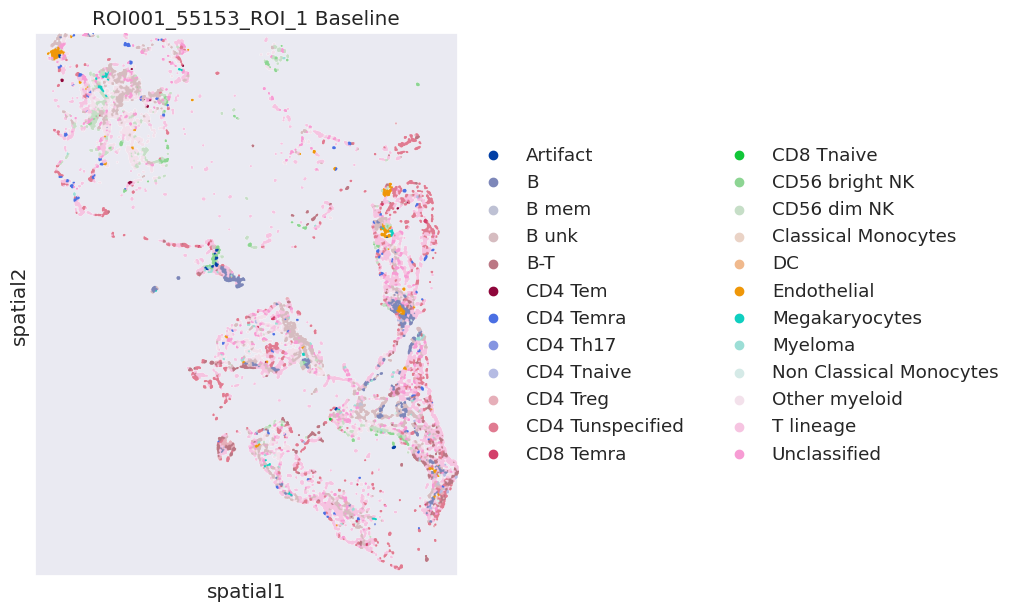

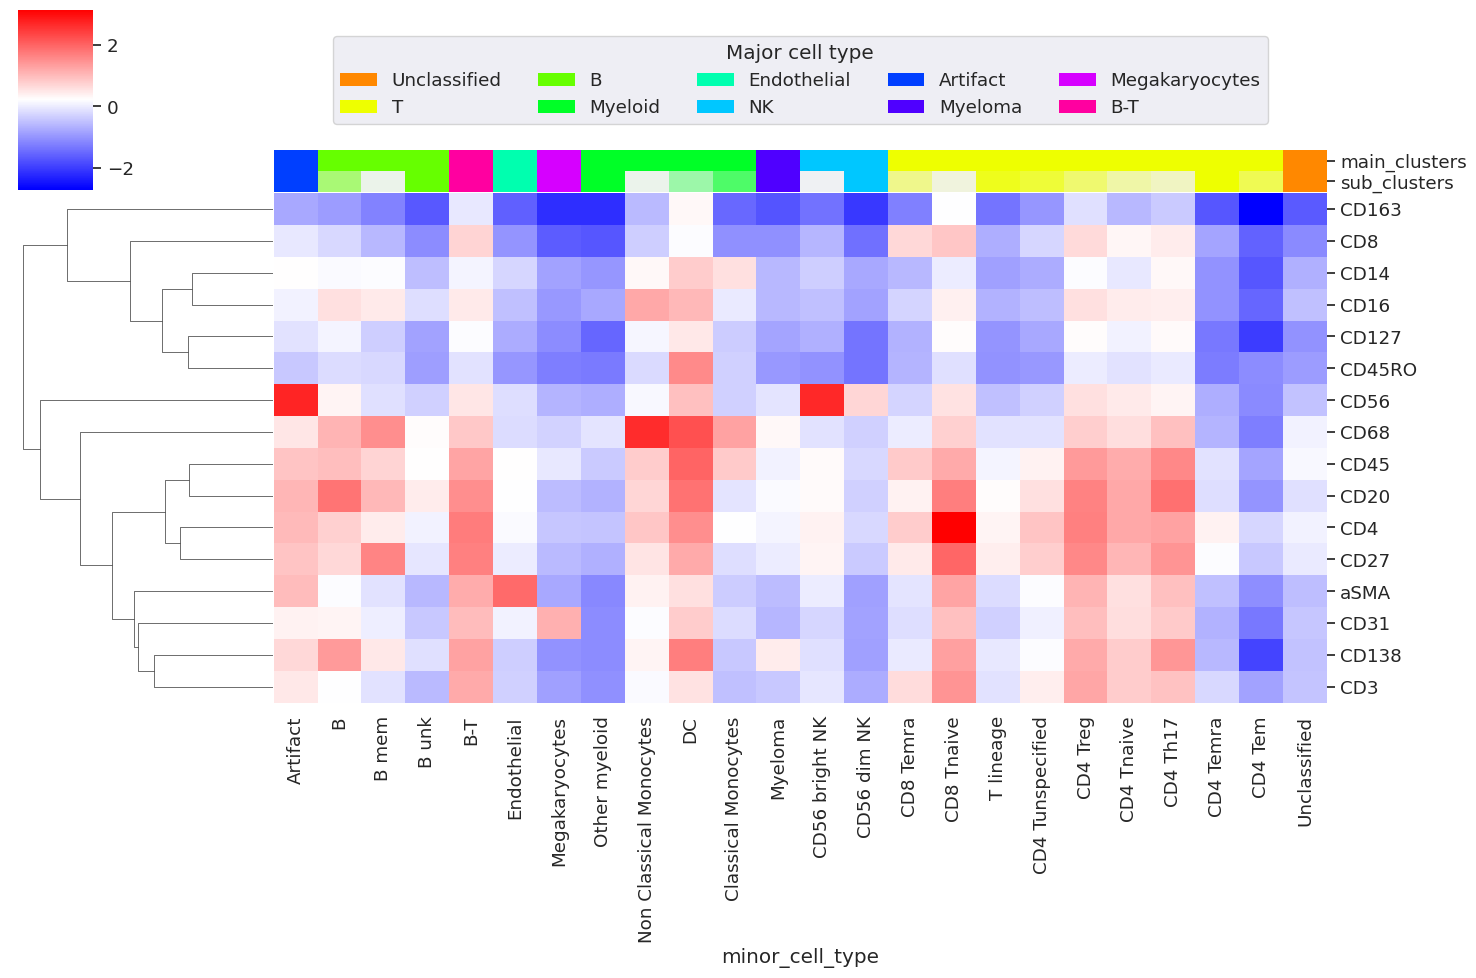

In [7]:
plot_slide(adata,slides_oi[1])

B and B mem are positive to CD138: label them as myeloma

In [8]:
map_dict = {'B':'Myeloma','B mem':'Myeloma','B unk':'B'}
adata= update_labels(adata, map_dict,slides_oi[1])

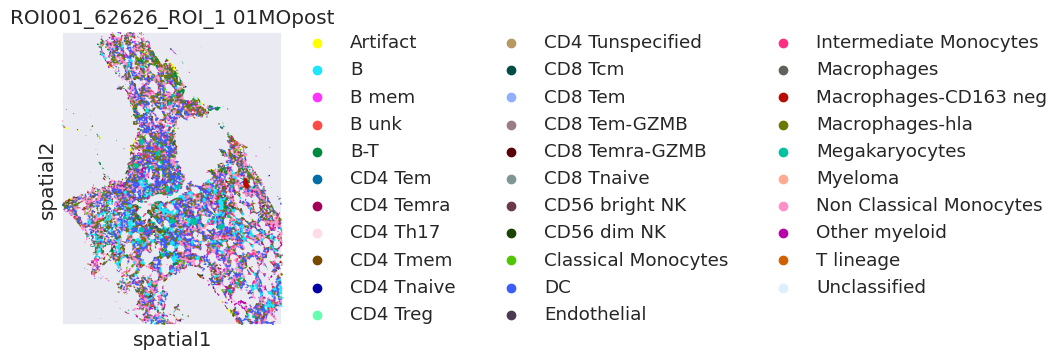

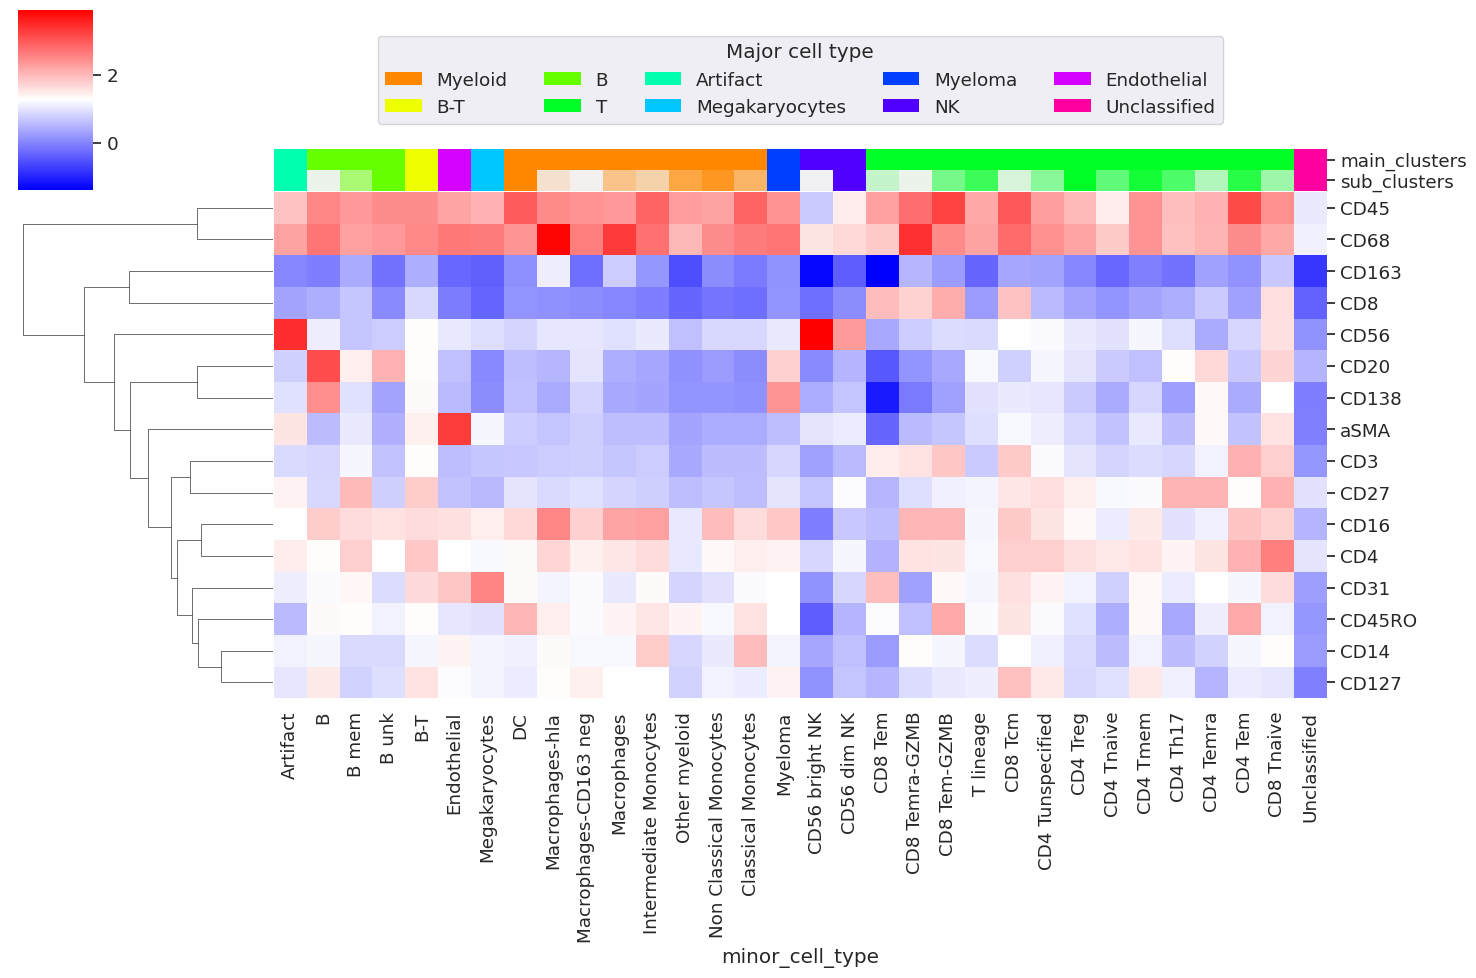

In [9]:
plot_slide(adata,slides_oi[2])

B is positive to CD138: label them as myeloma

In [10]:
map_dict = {'B':'Myeloma','B mem':'B','B unk':'B'}
adata= update_labels(adata, map_dict,slides_oi[2])

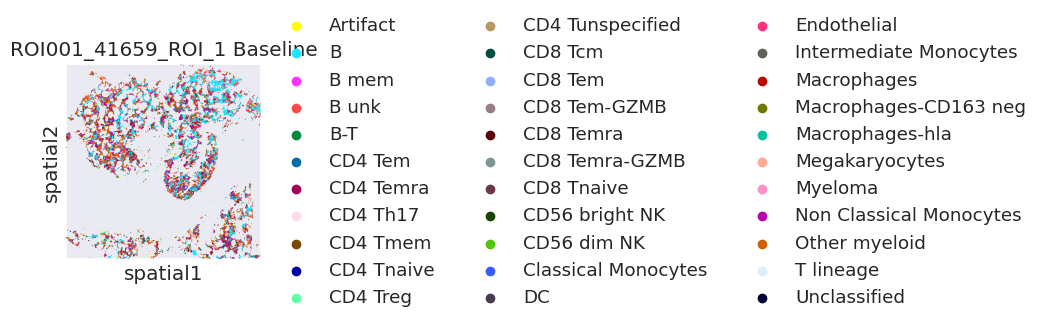

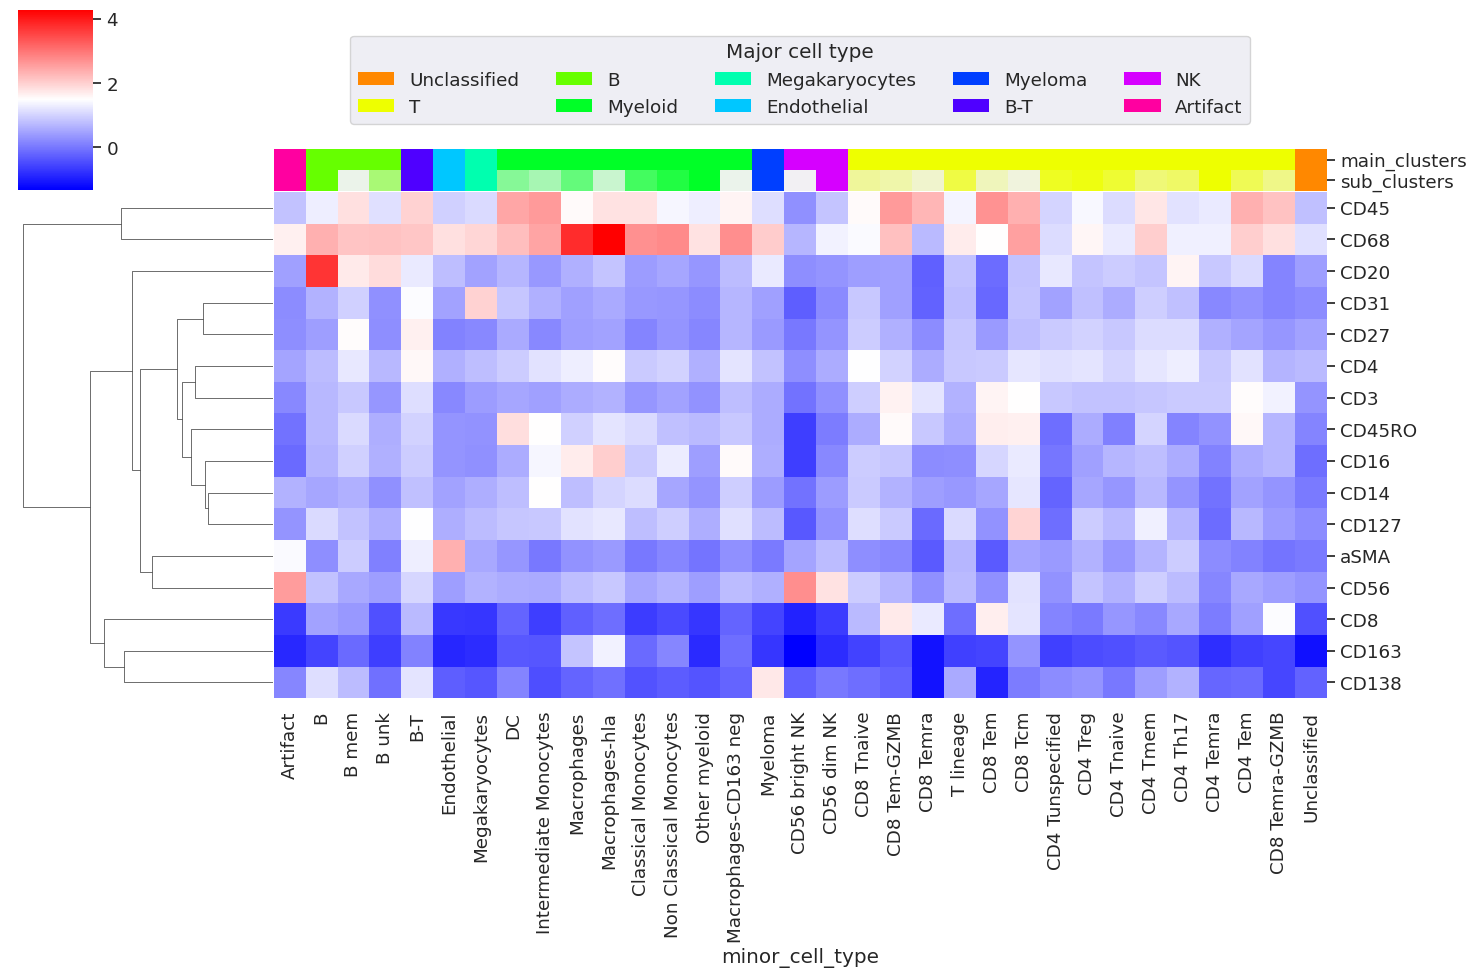

In [11]:
plot_slide(adata,slides_oi[3])

CD138 low, Myeloma considerin H&E

In [12]:
map_dict = {'B':'Myeloma','B mem':'Myeloma','B unk':'B'}
adata= update_labels(adata, map_dict,slides_oi[3])

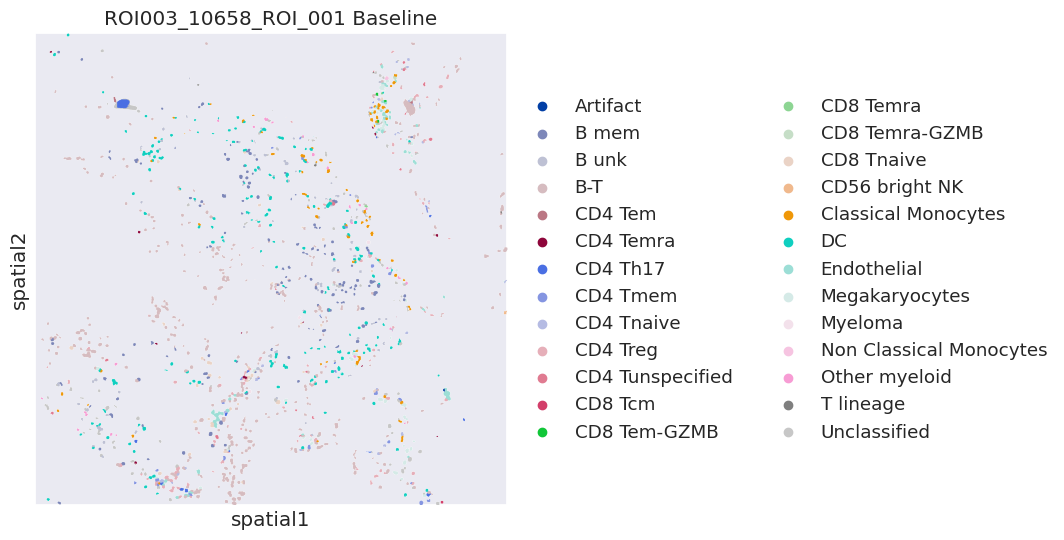

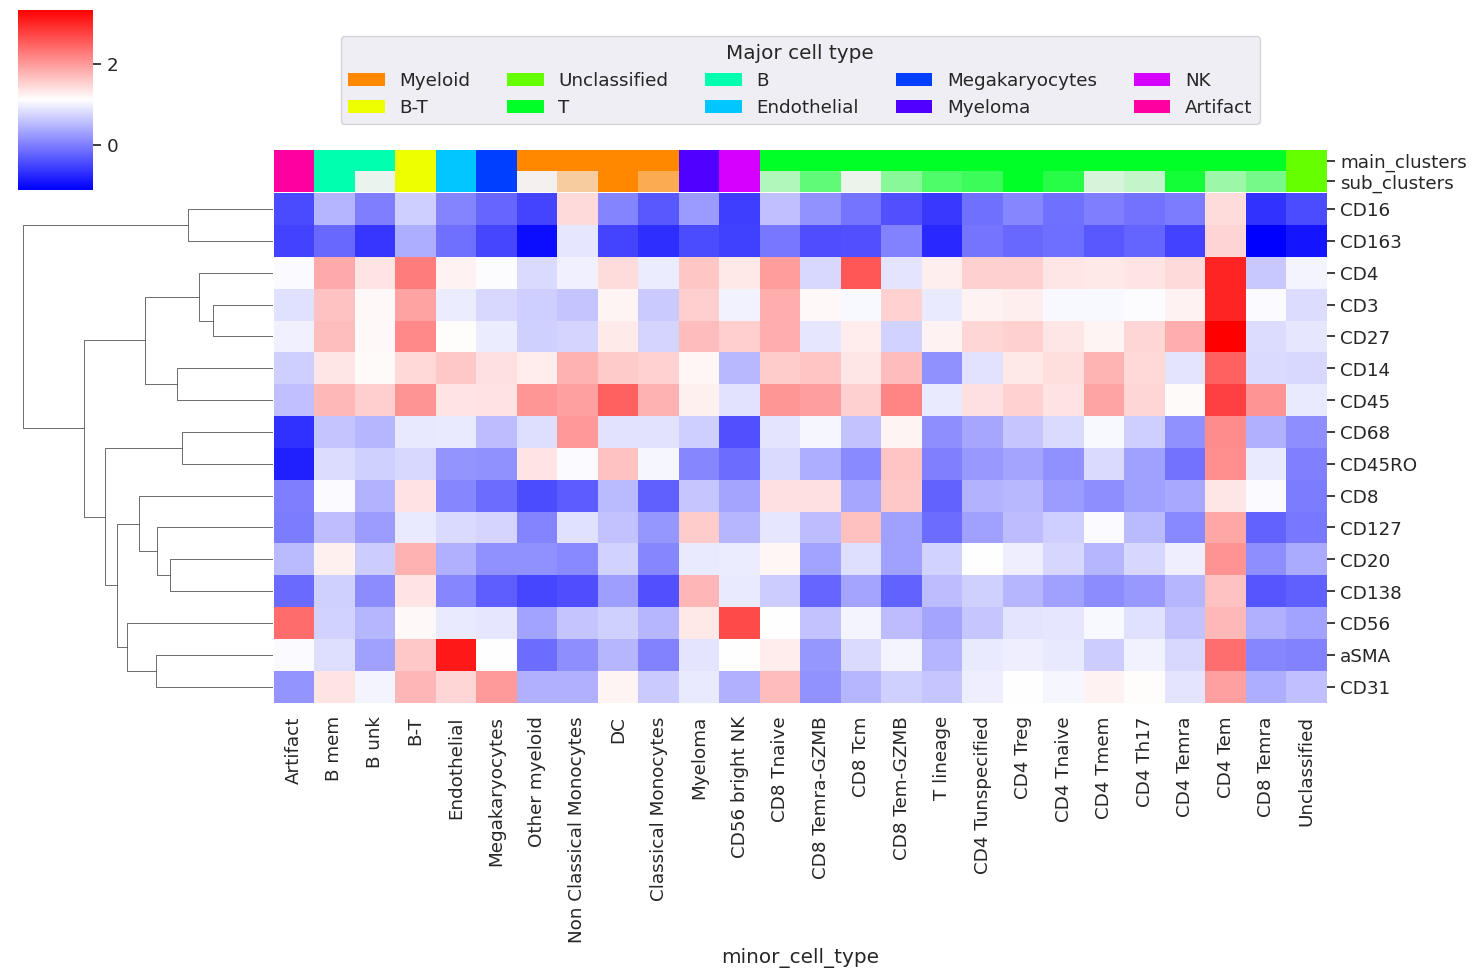

In [13]:
plot_slide(adata,slides_oi[4])

CD31 pos, similarities with B-T

In [14]:
map_dict = {'B':'B','B mem':'B-T','B unk':'B unk'}
adata= update_labels(adata, map_dict,slides_oi[4])

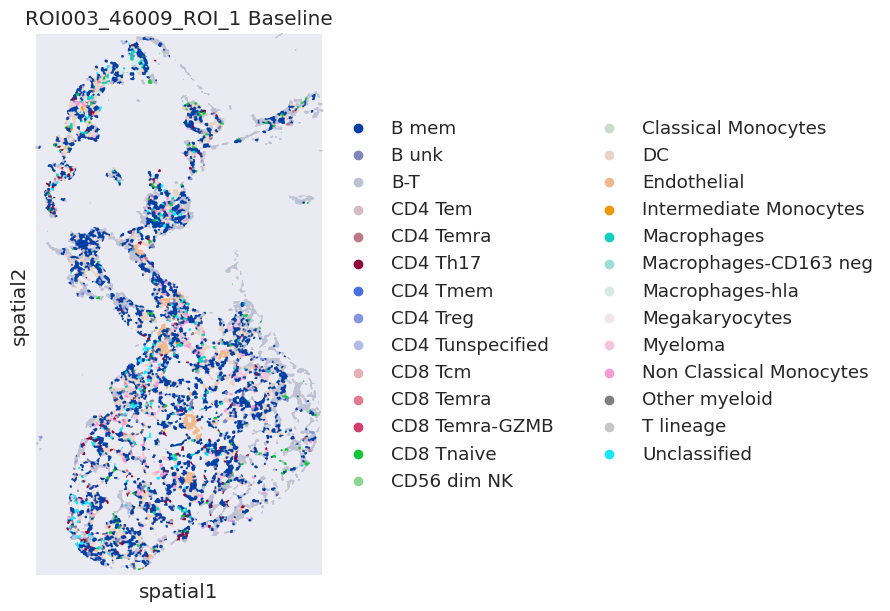

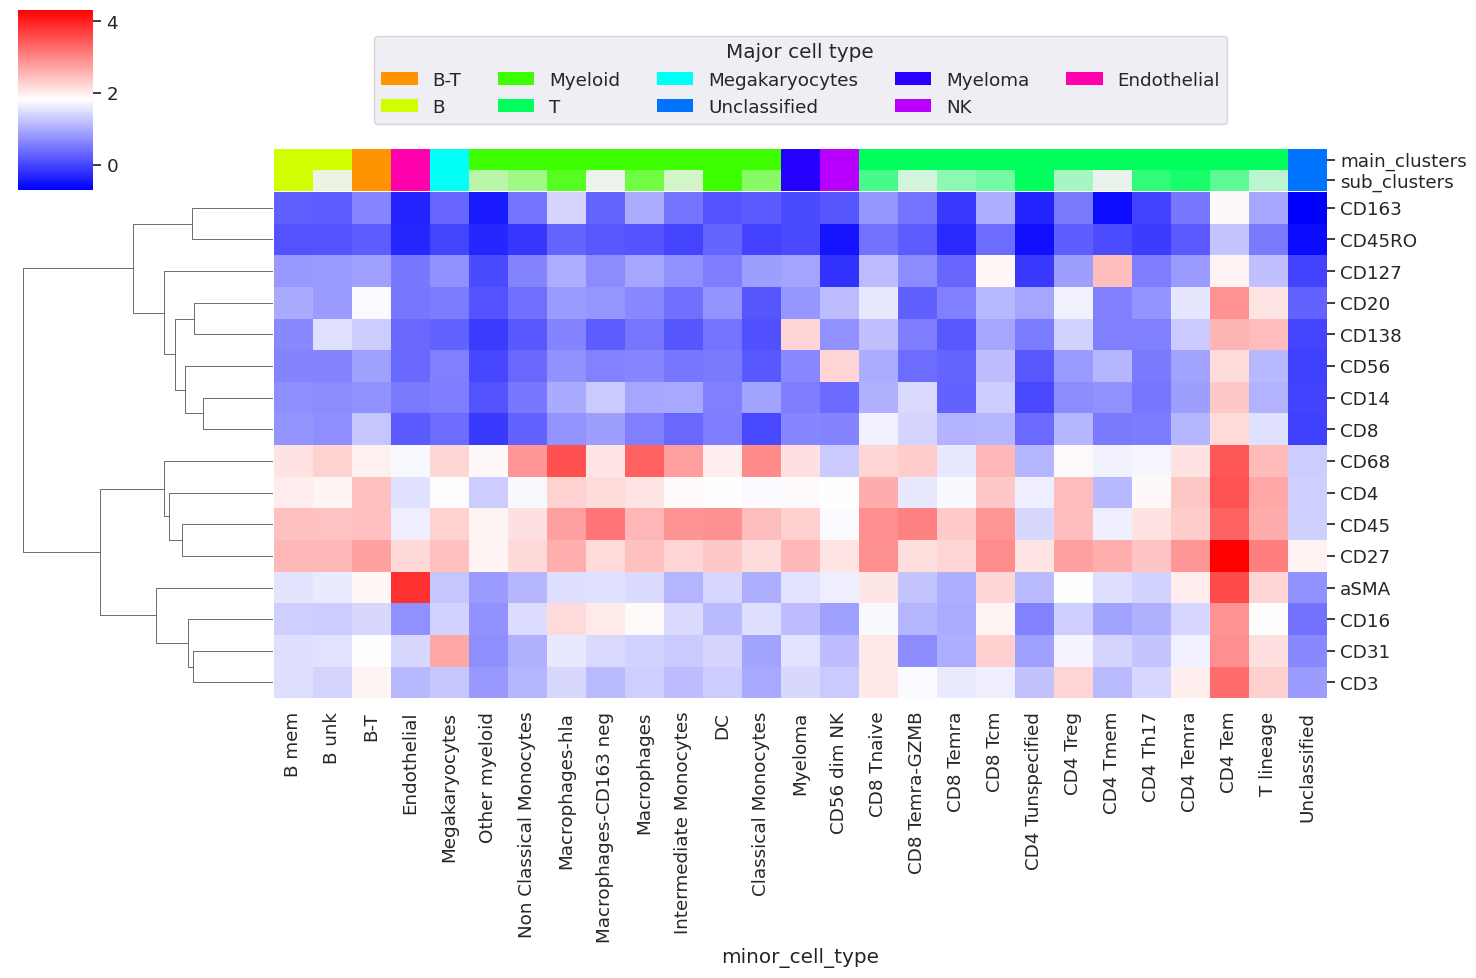

In [15]:
plot_slide(adata,slides_oi[5])

B mem are Myeloma (from H&E)

In [16]:
map_dict = {'B':'B','B mem':'Myeloma','B unk':'B unk'}
adata= update_labels(adata, map_dict,slides_oi[5])

## Rename NK_dim to artifacts in 46300

In [17]:
slide_oi='ROI002_46300_ROI_1'

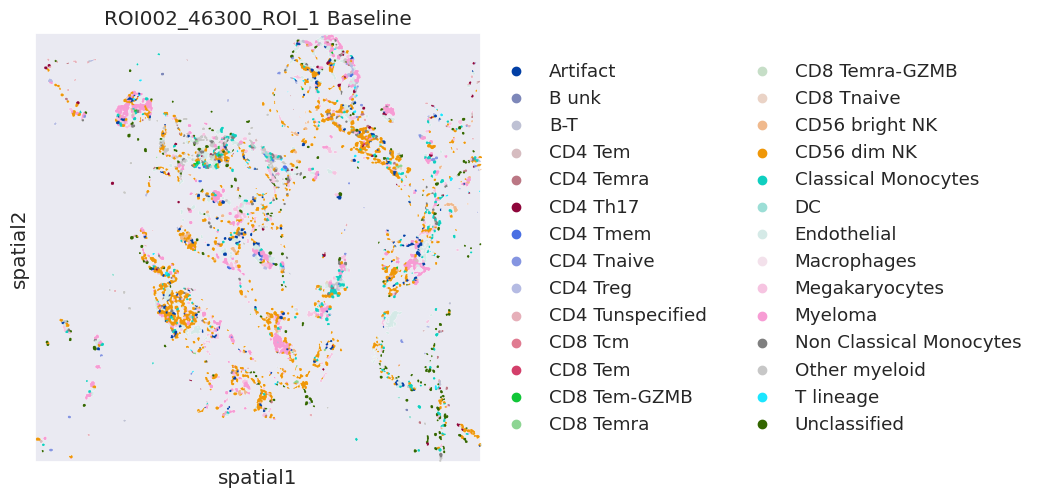

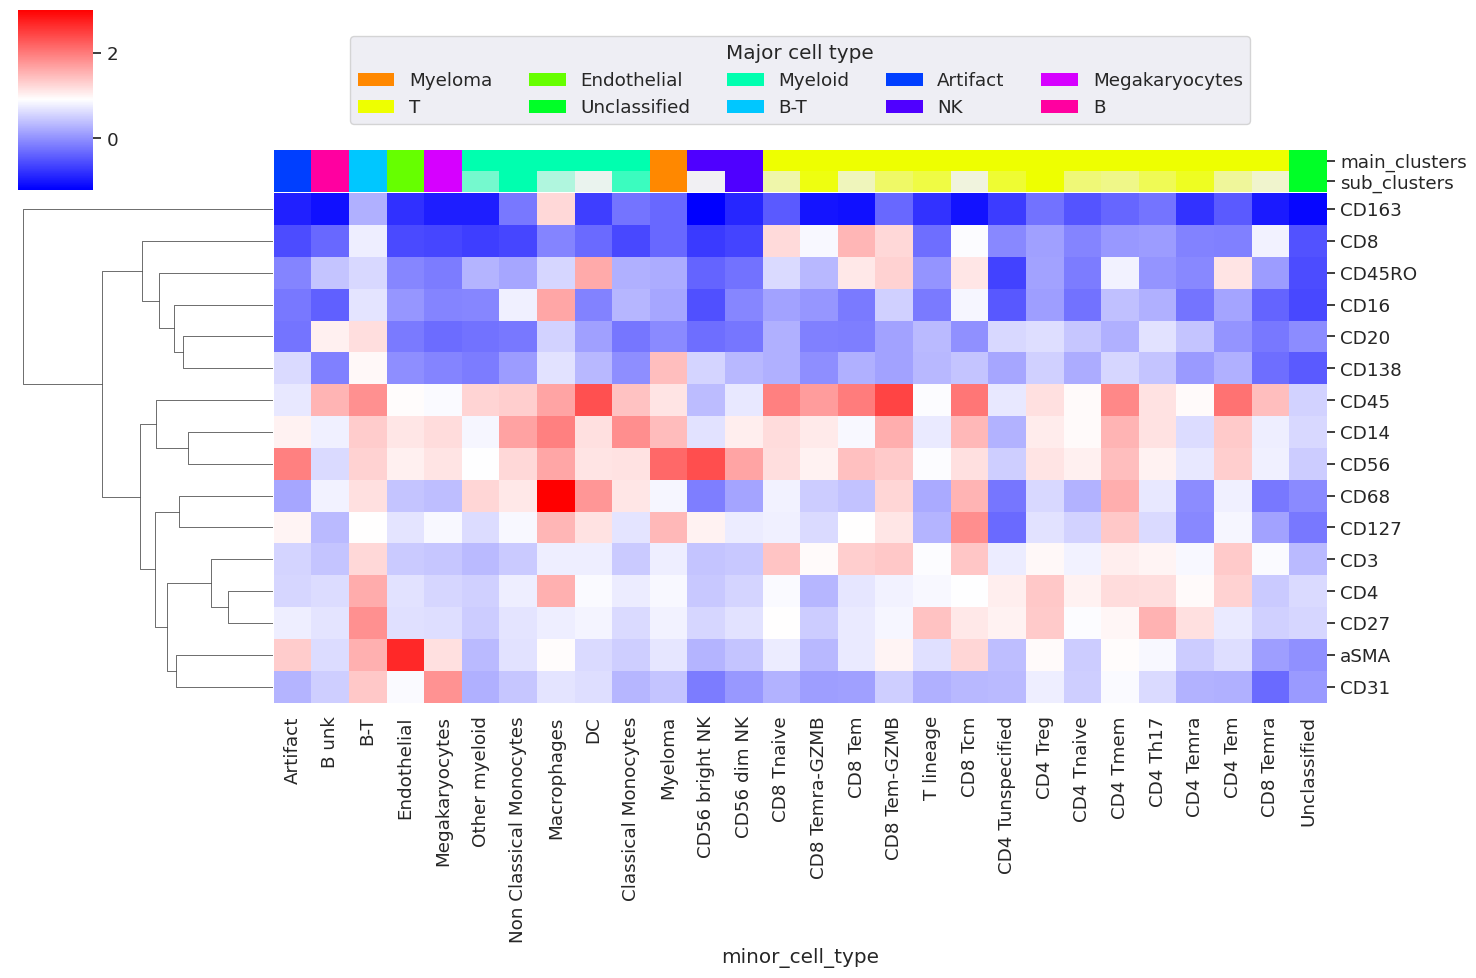

In [18]:
plot_slide(adata,slide_oi)

Rename NK dim to artifacts

In [19]:
map_dict = {'CD56 dim NK':'Artifact'}
adata= update_labels(adata, map_dict,slide_oi,target='Artifact')

## Remove 45629

In [20]:
slide_oi='ROI001_45629_ROI_1'

adata=adata[adata.obs['library_id']!=slide_oi]
spatial=adata.uns['spatial']
del spatial[slide_oi]
adata.uns['spatial']=spatial

In [21]:
adata

AnnData object with n_obs × n_vars = 514340 × 36
    obs: 'area', 'centroid-0', 'centroid-1', 'axis_major_length', 'axis_minor_length', 'eccentricity', 'Cell_ID', 'library_id', 'sample_id', 'ObjectNumber', 'patient_n', 'timepoint', 'tissue_id', 'slide_id', 'ROI', 'width_px', 'height_px', 'major_celltype', 'major_cell_type', 'minor_cell_type', 'DFCI_id', 'MRN'
    uns: 'spatial'
    obsm: 'PCA', 'UMAP_mnnCorrected', 'fastMNN', 'spatial'
    layers: 'exprs', 'logcounts'

In [22]:
filename = '../data/non_denoised/spe_minor_celltypes_clean_'+ time.strftime("%Y%m%d-%H%M%S") + '.h5ad'

In [24]:
print(filename)

../data/non_denoised/spe_minor_celltypes_clean_20240625-151001.h5ad


In [23]:
adata.write(filename)